In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

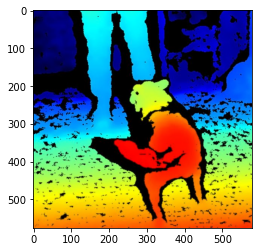

(576, 580, 3)


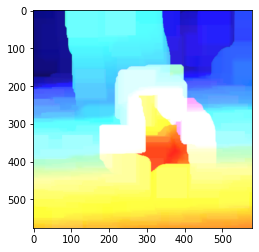

In [22]:
# reads image 'opencv-logo.png' as grayscale
img = cv2.imread('sample_picture.jpg')
img = img[0:, 200:780]
plt.imshow(img)
plt.show()

#dilate image (remove areas of black)
kernel = np.ones((5,5), np.uint8)
img = cv2.dilate(img, kernel, iterations=20)

plt.imshow(img)
vert, horiz, channels = np.shape(img)
print(np.shape(img))

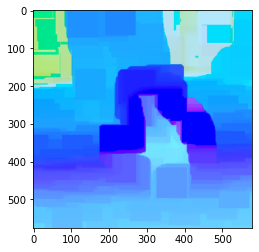

array([111, 232, 255], dtype=uint8)

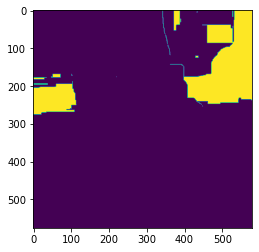

In [44]:
#https://www.youtube.com/watch?v=cMJwqxskyek
#filter for red
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

lower = np.array([0, 100, 160])
upper = np.array([15, 255, 255])
#lower = np.array([0,0,128], dtype=np.uint8)
#upper = np.array([255,255,255], dtype=np.uint8)

#lower = np.array([161, 155, 84], dtype=np.uint8)
#upper = np.array([179, 255, 255], dtype=np.uint8)

mask = cv2.inRange(hsv, lower, upper) # Masking the image to find our color
frame = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(mask)
hsv[350][380]

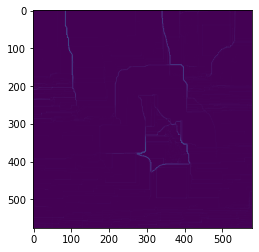

In [36]:
#high pass filtering
#convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])
#kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
img_filt = cv2.filter2D(gray,-1,kernel)
plt.imshow(img_filt)

In [29]:
#reset img with lines
imgL = img

580
193


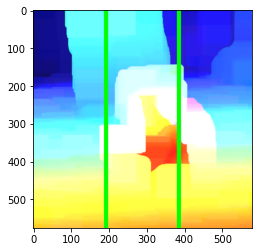

In [30]:
#draw lines

#divide image into zones:
print(horiz)
div = round(horiz / 3)
print(round(div))

start_point = (div, 0)
start_point2 = (div*2, 0)
end_point = (div, vert)
end_point2 = (div*2, vert)
color = (0, 255, 0)
thickness = 9
  
imgL = cv2.line(imgL, start_point, end_point, color, thickness)
imgL = cv2.line(imgL, start_point2, end_point2, color, thickness)
plt.imshow(imgL)

In [ ]:
#if obstacle detected in center area, and obstacle branches into another zone
#command that the robot travels toward the opposite zone

#might be a good idea to high-pass filter the image so we can capture where objects are and filter out noise (floor)
#from the foreground (see above)

#idea: then threshold the colored image with the lines and compare with the highpass filtered image to see if there
#is an obstacle deteted

#box the result of the detected area